In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [25]:
data = pd.read_csv('Datasets/Mall_Customers.csv')
print(data.shape)
data.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
data=pd.get_dummies(data, columns=["Gender"])
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [27]:
pca =PCA(n_components=2)

X = data.iloc[:, 1:].values
sc = StandardScaler()
X_scaled= sc.fit_transform(X)
X_pca = pca.fit_transform(X_scaled)
# X

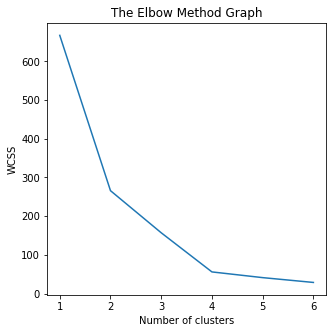

In [28]:
wcss=[]
for i in range(1,7): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
     kmeans.fit(X_pca)
     wcss.append(kmeans.inertia_)
# print(wcss)
plt.figure(figsize=(5,5))
plt.plot(range(1,7),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# plt.savefig('Elbow_Method.png')

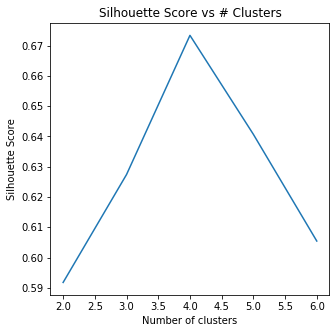

In [29]:
silhouette = []
kmax = 6

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X_pca)
  labels = kmeans.labels_
  silhouette.append(silhouette_score(X_pca, labels, metric = 'euclidean'))

# print(wcss)
plt.figure(figsize=(5,5))
plt.plot(range(2,7),silhouette)
plt.title('Silhouette Score vs # Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()
# plt.savefig('SilhouetteScore.png')

In [30]:
# fit kmeans object to data
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca) 

print(kmeans.cluster_centers_)
clustered_values= kmeans.fit_predict(X_pca)

print(clustered_values) 

[[-1.24880624  0.13038568]
 [ 1.58938976 -0.16594541]]
[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]


In [31]:
x=[]
y=[]
for item in X_pca:
    x.append(item[0])
    y.append(item[1])


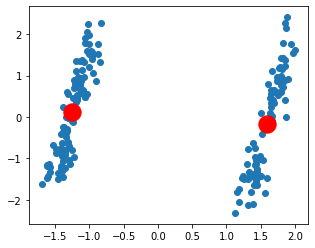

In [32]:
plt.figure(figsize=(5,4))
plt.scatter(x,y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()
# plt.savefig('K_Means.png')

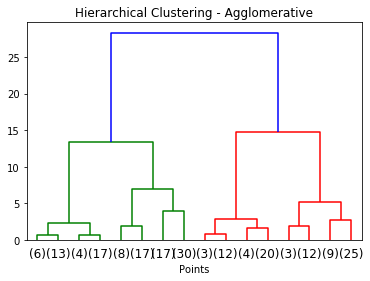

In [33]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_pca)
plt.title('Hierarchical Clustering - Agglomerative')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Points")
plt.show()